In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
import pandas as pd
import numpy as np

In [3]:
from agent import MABAgent
from agent import get_concept_drift
from agent import code_action

In [4]:
data = '../sarss.h5'

In [5]:
n_actions = 11 * 15

In [6]:
agent = MABAgent(n_actions=n_actions)

## get data

In [7]:
data_all = pd.read_hdf(data, key='sarss')
# process only traffic from both stations going to google
data = data_all[data_all['sites'] == ('google', 'google')]
columns_to_convert = ['new_channel', 'new_txpower', 'r']
# generates warning >> SettingWithCopyWarning
data.loc[:, columns_to_convert] = data.loc[:, columns_to_convert].astype('float')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
# define number of instances to use

n = data.shape[0]
n = 1800

In [9]:
data_to_use = data.iloc[:n, :]

In [10]:
drifts = get_concept_drift(data_to_use, n_train=40)  # get drift points from data
print("num drifts", len(drifts))

num drifts 6


# MAB iterations

In [11]:
t = 1
T = 2
double_trick = True
__iterations = []

for __iter in range(n):
    __d = data_to_use.iloc[__iter, :]
    """
        a) get data from real execution, including the action performed --ea
        b) get action proposed by the algorithm -- a
        c) compare result: ea == a ?
        d) probability of selecting ea?
        e) concept drift? yes, mark this point
        f) update system using pa, so the system learns the real environment

    """
    new_channel = float(__d['new_channel'])
    new_txpower = float(__d['new_txpower'])

    a = agent.get_action()  # best action using the current knowledge
    ea = code_action(new_channel, new_txpower)  # action performed

    Pa = agent.prob_action(a) * 100
    Pea = agent.prob_action(ea) * 100

    r = __d['r']  # reward received
    drift = __iter in drifts
    print('{} t: {} ch{} pwr {} Estimated action: {}[P={}] Actual action: {}[P={}] Reward: {} Drift {}'.format(__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift))

    __iterations.append([__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift])
    # don't need to run_action
    # r, success = agent.run_action(a)
    agent.update(ea, r)  # update using the executed action in order to learn

    t += 1
    if double_trick and t > T:
        t = 1
        agent.reset_pulls()
        try:
            T = 2 * T
        except OverflowError:
            T = args.T

0 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=0.6060606060606061] Actual action: 0[P=0.6060606060606061] Reward: 5.0 Drift False
1 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=39.061642643208785] Actual action: 82[P=39.061642643208785] Reward: 4.5117215 Drift False
2 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=41.48367793631152] Actual action: 82[P=41.48367793631152] Reward: 4.56176425 Drift False
3 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=26.94510449271934] Actual action: 82[P=26.94510449271934] Reward: 4.56176425 Drift False
4 t: 3 ch2.0 pwr 8.0 Estimated action: 82[P=22.089620980078912] Actual action: 82[P=22.089620980078912] Reward: 4.56176425 Drift False
5 t: 4 ch2.0 pwr 8.0 Estimated action: 82[P=19.06495931634829] Actual action: 82[P=19.06495931634829] Reward: 3.820358 Drift False
6 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=35.50369744883907] Actual action: 82[P=35.50369744883907] Reward: 3.4367145 Drift False
7 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=18.087725041274368] Actual acti

129 t: 4 ch3.0 pwr 1.0 Estimated action: 13[P=9.870866177651425] Actual action: 13[P=9.870866177651425] Reward: 4.55512275 Drift False
130 t: 5 ch3.0 pwr 1.0 Estimated action: 13[P=8.947758190371736] Actual action: 13[P=8.947758190371736] Reward: 4.55512275 Drift False
131 t: 6 ch3.0 pwr 1.0 Estimated action: 13[P=8.290134498440823] Actual action: 13[P=8.290134498440823] Reward: 4.55512275 Drift False
132 t: 7 ch3.0 pwr 1.0 Estimated action: 13[P=7.789994246300449] Actual action: 13[P=7.789994246300449] Reward: 4.55512275 Drift False
133 t: 8 ch3.0 pwr 1.0 Estimated action: 13[P=7.392358156939189] Actual action: 13[P=7.392358156939189] Reward: 4.55512275 Drift False
134 t: 9 ch3.0 pwr 1.0 Estimated action: 13[P=7.06588749389816] Actual action: 13[P=7.06588749389816] Reward: 4.55512275 Drift False
135 t: 10 ch3.0 pwr 1.0 Estimated action: 13[P=6.7912330005819355] Actual action: 13[P=6.7912330005819355] Reward: 4.55512275 Drift False
136 t: 11 ch3.0 pwr 1.0 Estimated action: 13[P=6.55571

271 t: 18 ch3.0 pwr 1.0 Estimated action: 13[P=5.359757779696755] Actual action: 13[P=5.359757779696755] Reward: 4.64237475 Drift False
272 t: 19 ch3.0 pwr 1.0 Estimated action: 13[P=5.259170912484539] Actual action: 13[P=5.259170912484539] Reward: 4.64237475 Drift False
273 t: 20 ch3.0 pwr 1.0 Estimated action: 13[P=5.166197045803506] Actual action: 13[P=5.166197045803506] Reward: 4.64237475 Drift False
274 t: 21 ch3.0 pwr 1.0 Estimated action: 13[P=5.079899444241582] Actual action: 13[P=5.079899444241582] Reward: 4.652521375 Drift False
275 t: 22 ch3.0 pwr 1.0 Estimated action: 13[P=4.999708358799921] Actual action: 13[P=4.999708358799921] Reward: 4.652521375 Drift False
276 t: 23 ch3.0 pwr 1.0 Estimated action: 13[P=4.924744807115202] Actual action: 13[P=4.924744807115202] Reward: 4.652521375 Drift False
277 t: 24 ch3.0 pwr 1.0 Estimated action: 13[P=4.85444993892807] Actual action: 13[P=4.85444993892807] Reward: 4.652521375 Drift False
278 t: 25 ch3.0 pwr 1.0 Estimated action: 13[P

421 t: 168 ch3.0 pwr 1.0 Estimated action: 13[P=2.651852538703498] Actual action: 13[P=2.651852538703498] Reward: 4.7133495 Drift False
422 t: 169 ch3.0 pwr 1.0 Estimated action: 13[P=2.6479231317064222] Actual action: 13[P=2.6479231317064222] Reward: 4.7133495 Drift False
423 t: 170 ch3.0 pwr 1.0 Estimated action: 13[P=2.6440238451685896] Actual action: 13[P=2.6440238451685896] Reward: 4.693501125 Drift False
424 t: 171 ch3.0 pwr 1.0 Estimated action: 13[P=2.6400185677240757] Actual action: 13[P=2.6400185677240757] Reward: 4.7133495 Drift False
425 t: 172 ch3.0 pwr 1.0 Estimated action: 13[P=2.636178806398609] Actual action: 13[P=2.636178806398609] Reward: 4.7133495 Drift False
426 t: 173 ch3.0 pwr 1.0 Estimated action: 13[P=2.632367911068069] Actual action: 13[P=2.632367911068069] Reward: 4.7133495 Drift False
427 t: 174 ch3.0 pwr 1.0 Estimated action: 13[P=2.6285854817047354] Actual action: 13[P=2.6285854817047354] Reward: 4.7133495 Drift False
428 t: 175 ch3.0 pwr 1.0 Estimated act

679 t: 170 ch3.0 pwr 1.0 Estimated action: 13[P=2.6764793921538503] Actual action: 13[P=2.6764793921538503] Reward: 4.7252125 Drift False
680 t: 171 ch3.0 pwr 1.0 Estimated action: 13[P=2.6722174101609175] Actual action: 13[P=2.6722174101609175] Reward: 4.7252125 Drift False
681 t: 172 ch3.0 pwr 1.0 Estimated action: 13[P=2.6679893564365984] Actual action: 13[P=2.6679893564365984] Reward: 4.7252125 Drift False
682 t: 173 ch3.0 pwr 1.0 Estimated action: 13[P=2.663794755431115] Actual action: 13[P=2.663794755431115] Reward: 4.7252125 Drift False
683 t: 174 ch3.0 pwr 1.0 Estimated action: 13[P=2.6596331410112284] Actual action: 13[P=2.6596331410112284] Reward: 4.7252125 Drift False
684 t: 175 ch3.0 pwr 1.0 Estimated action: 13[P=2.655504056220456] Actual action: 13[P=2.655504056220456] Reward: 4.7252125 Drift False
685 t: 176 ch3.0 pwr 1.0 Estimated action: 13[P=2.6514070530468246] Actual action: 13[P=2.6514070530468246] Reward: 4.7252125 Drift False
686 t: 177 ch3.0 pwr 1.0 Estimated act

923 t: 414 ch3.0 pwr 1.0 Estimated action: 13[P=2.088122987821237] Actual action: 13[P=2.088122987821237] Reward: 4.51673825 Drift False
924 t: 415 ch3.0 pwr 1.0 Estimated action: 13[P=2.086383342002278] Actual action: 13[P=2.086383342002278] Reward: 4.51673825 Drift False
925 t: 416 ch3.0 pwr 1.0 Estimated action: 13[P=2.084649374750769] Actual action: 13[P=2.084649374750769] Reward: 4.51673825 Drift False
926 t: 417 ch3.0 pwr 1.0 Estimated action: 13[P=2.0829210546933776] Actual action: 13[P=2.0829210546933776] Reward: 4.51673825 Drift False
927 t: 418 ch3.0 pwr 1.0 Estimated action: 13[P=2.0811983507030396] Actual action: 13[P=2.0811983507030396] Reward: 4.51673825 Drift False
928 t: 419 ch3.0 pwr 1.0 Estimated action: 13[P=2.079481231896412] Actual action: 13[P=2.079481231896412] Reward: 4.51673825 Drift False
929 t: 420 ch3.0 pwr 1.0 Estimated action: 13[P=2.077769667631422] Actual action: 13[P=2.077769667631422] Reward: 4.51673825 Drift False
930 t: 421 ch3.0 pwr 1.0 Estimated ac

1203 t: 182 ch1.0 pwr 5.0 Estimated action: 51[P=2.9709421938248903] Actual action: 51[P=2.9709421938248903] Reward: 4.16970525 Drift False
1204 t: 183 ch1.0 pwr 5.0 Estimated action: 51[P=2.9567816217639384] Actual action: 51[P=2.9567816217639384] Reward: 4.70259225 Drift False
1205 t: 184 ch1.0 pwr 5.0 Estimated action: 51[P=2.9516275066344138] Actual action: 51[P=2.9516275066344138] Reward: 4.70259225 Drift False
1206 t: 185 ch1.0 pwr 5.0 Estimated action: 51[P=2.9465093028351093] Actual action: 51[P=2.9465093028351093] Reward: 4.70259225 Drift False
1207 t: 186 ch1.0 pwr 5.0 Estimated action: 51[P=2.9414265995735165] Actual action: 51[P=2.9414265995735165] Reward: 4.70259225 Drift False
1208 t: 187 ch1.0 pwr 5.0 Estimated action: 51[P=2.9363789923603605] Actual action: 51[P=2.9363789923603605] Reward: 4.70259225 Drift False
1209 t: 188 ch1.0 pwr 5.0 Estimated action: 51[P=2.931366082893783] Actual action: 51[P=2.931366082893783] Reward: 4.70259225 Drift False
1210 t: 189 ch1.0 pwr 

1421 t: 400 ch1.0 pwr 5.0 Estimated action: 51[P=2.2219780783042324] Actual action: 51[P=2.2219780783042324] Reward: 4.693564875 Drift False
1422 t: 401 ch1.0 pwr 5.0 Estimated action: 51[P=2.2203816182690512] Actual action: 51[P=2.2203816182690512] Reward: 4.693564875 Drift False
1423 t: 402 ch1.0 pwr 5.0 Estimated action: 51[P=2.218790119449282] Actual action: 51[P=2.218790119449282] Reward: 4.693564875 Drift False
1424 t: 403 ch1.0 pwr 5.0 Estimated action: 51[P=2.2172035559451975] Actual action: 51[P=2.2172035559451975] Reward: 4.693564875 Drift False
1425 t: 404 ch1.0 pwr 5.0 Estimated action: 51[P=2.215621902042398] Actual action: 51[P=2.215621902042398] Reward: 4.693564875 Drift False
1426 t: 405 ch1.0 pwr 5.0 Estimated action: 51[P=2.2140451322101993] Actual action: 51[P=2.2140451322101993] Reward: 4.693564875 Drift False
1427 t: 406 ch1.0 pwr 5.0 Estimated action: 51[P=2.2124732210999825] Actual action: 51[P=2.2124732210999825] Reward: 4.693564875 Drift False
1428 t: 407 ch1.0

1636 t: 615 ch5.0 pwr 8.0 Estimated action: 85[P=2.4464327663818324] Actual action: 85[P=2.4464327663818324] Reward: 4.7726525 Drift False
1637 t: 616 ch5.0 pwr 8.0 Estimated action: 85[P=2.443107377698135] Actual action: 85[P=2.443107377698135] Reward: 4.7726525 Drift False
1638 t: 617 ch5.0 pwr 8.0 Estimated action: 85[P=2.4398136779345494] Actual action: 85[P=2.4398136779345494] Reward: 4.7726525 Drift False
1639 t: 618 ch5.0 pwr 8.0 Estimated action: 85[P=2.4365510836886224] Actual action: 85[P=2.4365510836886224] Reward: 4.7726525 Drift False
1640 t: 619 ch5.0 pwr 8.0 Estimated action: 85[P=2.433319026698986] Actual action: 85[P=2.433319026698986] Reward: 4.7726525 Drift False
1641 t: 620 ch5.0 pwr 8.0 Estimated action: 85[P=2.430116953355283] Actual action: 85[P=2.430116953355283] Reward: 4.7726525 Drift False
1642 t: 621 ch5.0 pwr 8.0 Estimated action: 85[P=2.4269443242265627] Actual action: 85[P=2.4269443242265627] Reward: 4.7726525 Drift False
1643 t: 622 ch5.0 pwr 8.0 Estimat

# Plot evolution

In [12]:
drifts_inGraph = np.array(drifts)
drifts_inGraph = drifts_inGraph[drifts_inGraph < n]

In [13]:
# drifts_inGraph

In [32]:
def plot_drifts(ax, drifts, _max, _min=0):
    first_ = True
    for x in drifts:
        if first_:
            ax.plot([x, x], [_min, _max], color='green', label='Drift detected')
            first_ = False
        else:
            ax.plot([x, x], [_min, _max], color='green')

In [15]:
__r = data_to_use.iloc[:n, :]['r']

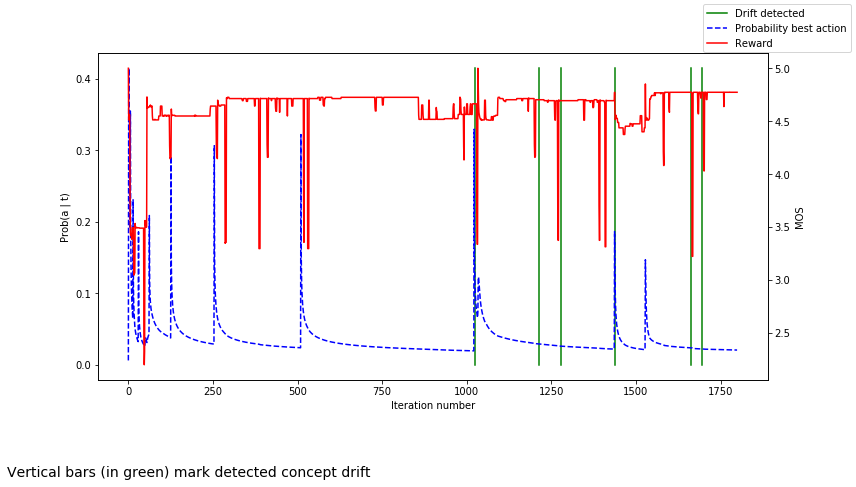

In [45]:
x = [v[0] for v in __iterations]
p1 = [v[5] / 100.0 for v in __iterations]
p2 = [v[7] / 100.0 for v in __iterations]

max_y = max(np.max(p1), np.max(p2))

fig = plt.figure()
ax1 = plt.gca()

plot_drifts(ax1, drifts_inGraph, max_y)
# plt.plot(x, p1, ":", label='Best estimated probability', color='red')  # ":"
plt.plot(x, p2, "--", label='Probability best action', color='blue')  # "--"
ax1.set_ylabel("Prob(a | t)")
ax1.set_xlabel("Iteration number")
# ax1.set_title("Probability of action and Reward")

ax2 = ax1.twinx()
ax2.plot(x, __r, "-", label='Reward', color='red')  # ":"
ax2.set_ylabel("MOS")

#fig.legend(loc='upper left', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.legend(loc=1)

_ = plt.text(0.02, -0.1, 'Vertical bars (in green) mark detected concept drift', fontsize=14, transform=plt.gcf().transFigure)

plt.savefig('Detection.pdf', quality=100, dpi=600, papertype='A4')